# Beginning Project Dashboard

Oh boy here goes a bunch of stuff

In [1]:
# Common imports from Python standard libraries
from dataclasses import dataclass
import math

# Common imports from
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats
from scipy import cluster
from statistics import mean
from sklearn.neighbors import KernelDensity
import sklearn.metrics
from scipy.stats import gaussian_kde
import time
import datetime as dt
import dateutil as du

# Useful imports for visualization
import seaborn

# Other packages
import networkx as nx
import pyvis as pv

# Used for Part 1
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

# Constants
EPS = 0.0000001
FINAL = False

# Some useful functions
def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

# Code provided from HW4
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)

In [2]:
df = pd.read_csv("../DATASETS/US_Accidents_Dec20_updated.csv")

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.keys()

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# 1. Data preparation

We want to be able to index this list by the following:

1. Year (2016, 2017, 2018, 2019, 2020)
2. Month (1, 2, ..., 3)
3. Day (1, 2, ..., 31)
4. Weekdays (Sun, Mon, Tue, Wed, Thur, Fri, Sat)
5. State (per coordinates)

To do this, we'll have **dictionaries** pointing to **indices**, i.e. `dict` mapping `str` or `int` to `numpy.array` with dtype int. As a concrete example, we might have `year_indices[2016] = [0, 1, 2, 3, 4, ...]`, `state_indices['ct'] = [10001, 14323, ...]`, etc.

We'll then index, e.g. as `df.loc[state_indices['ct']]`

In [42]:
start_times = list(df['Start_Time'])


In [46]:
# E.g. Let's see how many accidents per minute of the date

times = np.zeros(1440)

for ii in range(len(start_times)):
    if ii % 100000 == 0:
        print(ii)
    try:
        # interpret with datetime
        at = du.parser.parse(start_times[ii])
        # get integer of time
        minute_index = at.hour*60 + at.minute
        times[minute_index] += 1
    except:
        print(f"Error, could not interpret at index {ii} time: \"{st}\"")
    

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [50]:
saved_times = times

In [54]:
np.save("crashes_summed_over_minutes.npy", saved_times)

Text(0.5, 0, 'Minute of a day')

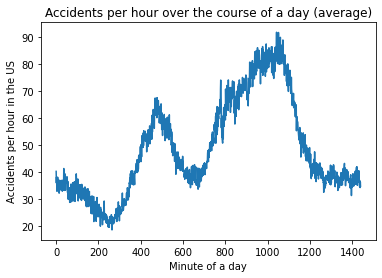

In [52]:
plt.plot(range(1440), times * 60 / 1300)
plt.title("Accidents per hour over the course of a day (average)")
plt.ylabel("Accidents per hour in the US")
plt.xlabel("Minute of a day")

# 1300 days

In [63]:
kde = KernelDensity(bandwidth = 1.0, kernel = 'gaussian')
kde.fit(times.reshape(-1,1))

KernelDensity()

In [108]:
bandwidths = [10, 60, 120]
Xs = range(1440)

#data = np.concatenate((times, times, times)).reshape(-1,1)
data = times.reshape(-1,1)

def get_Ys(bandwidth = 1.0, data = data, Xs=Xs):
    kde = KernelDensity(bandwidth = bandwidth, kernel = 'gaussian')
    kde.fit(data)
    return np.exp([kde.score([[xx]]) for xx in Xs])
    #return np.array([kde.score([[xx]]) for xx in Xs])


all_Ys = {bandwidth : get_Ys(bandwidth, times.reshape(-1,1)) for bandwidth in bandwidths}

all_Ys.keys()

dict_keys([10, 60, 120])

In [109]:
times.shape

(1440,)

In [110]:
all_Ys[10].shape

(1440,)

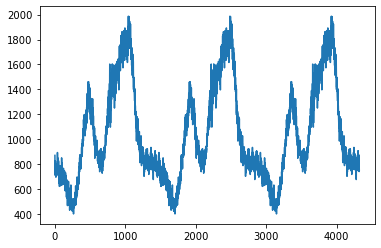

In [82]:
# Slide arrays

def slide(array, start=720, total=1440):
    return np.array([array[start + ii % len(array)] for ii in range(total)])

# ignore this
all_Ys_mod = {bandwidth : slide(all_Ys[bandwidth]) for bandwidth in all_Ys.keys()}

plt.plot(range(1440*3), data)

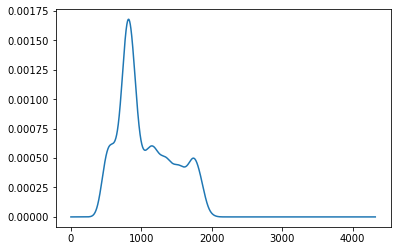

In [99]:
plt.plot(Xs, all_Ys[60])

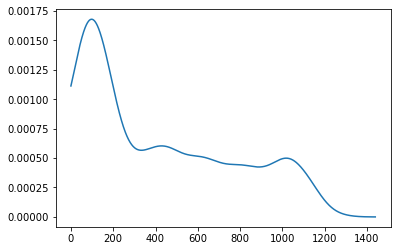

In [93]:
plt.plot(range(1440), all_Ys_mod[60])

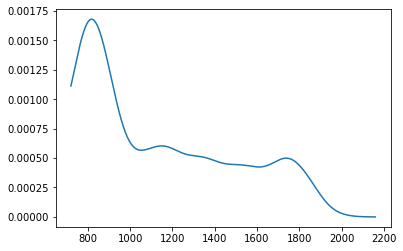

In [87]:
plt.plot(Xs[720:720+1440], all_Ys[60][720:720+1440])

In [ ]:
app = dash.Dash(name="Hella World")

app.layout = html.Div(
    [
        html.Div(
            [
                html.P("Kernel Bandwidth"),
                dcc.RadioItems(
                    id = "bandwidth",
                    options = [{'value' : x, 'label' : x} for x in bandwidths],
                    value = [0.3],
                    labelStyle = {'display' : 'inline-block'}
                )
            ]
        ),
        dcc.Graph(
            id = "plot",
            style = {'width' : '60%', 'display' : 'inline-block'},
            clear_on_unhover = True
        )
    ],
    style = {'width': '100%', 'display': 'inline-block'}
)

@app.callback(
    Output("plot", "figure"),
    [Input("bandwidth", "value")]
)
def display_histogram(bandwidth=0.3):
    fig = px.line(
        x=Xs,
        y=all_Ys[bandwidth],
        title = f"KDE of accidents with bandwidth {bandwidth:.2f}"
    )
    return fig

app.run_server(port=12345, debug=False)

Dash is running on http://127.0.0.1:12345/

Dash is running on http://127.0.0.1:12345/

Dash is running on http://127.0.0.1:12345/

 * Serving Flask app 'Hella World' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:12345/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Nov/2021 16:29:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:03] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:03] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:03] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:03] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/dash/dash.py", line 1336, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/dash/_callback.py", line 151, 

127.0.0.1 - - [03/Nov/2021 16:29:03] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [03/Nov/2021 16:29:04] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:22] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:22] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:29:22] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/dash/dash.py", line 1336, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/dash/_callback.py", line 151, 

127.0.0.1 - - [03/Nov/2021 16:29:22] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/dash/dash.py", line 1336, in dispatch
    response.set_data(func(*args, outputs_list=outputs_list))
  File "/home/lynn/miniconda3/envs/5520/lib/python3.9/site-packages/dash/_callback.py", line 151, 

127.0.0.1 - - [03/Nov/2021 16:29:22] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [03/Nov/2021 16:29:22] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 16:51:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 17:02:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 17:02:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 17:02:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 17:02:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 17:02:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Nov/2021 17:10:20] "POST /_dash-update-comp

In [18]:
st = df.loc[0]['Start_Time']
st

'2016-02-08 00:37:08'

In [24]:
at = dt.datetime.fromisoformat(st)

at.hour

0

In [19]:
len(df)

1516064

# 2. KDE dashboard